In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

# Age, EstimatedSalary


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

base_model = DecisionTreeClassifier(max_depth=1)

classifier = AdaBoostClassifier(
estimator=base_model,
n_estimators=50,
learning_rate=1.0,
random_state=42
)

In [14]:
classifier.fit(X_train,y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [10]:
y_pred=classifier.predict(X_test)
print("Accuraacy:", accuracy_score(y_test, y_pred))

Accuraacy: 0.8875


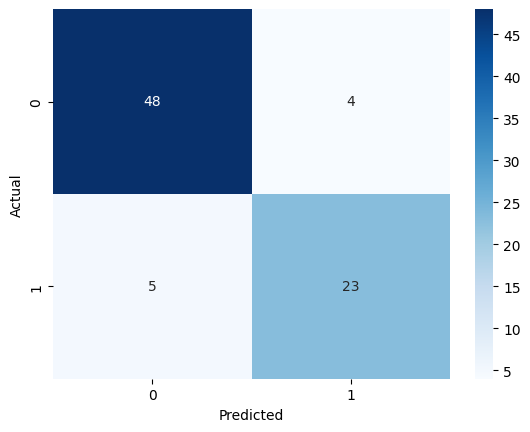

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(
n_estimators=100,
learning_rate=1.0,
random_state=42
)

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
print("Accuraacy:", accuracy_score(y_test, y_pred))

Accuraacy: 0.8625


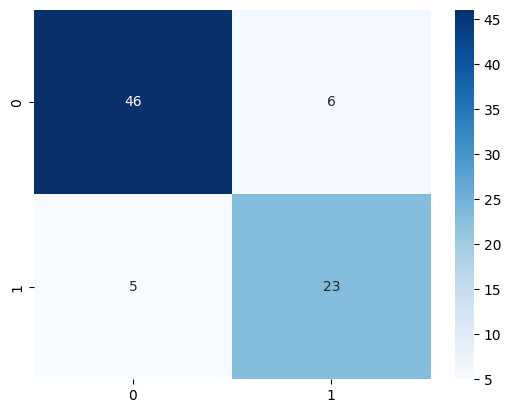

In [19]:
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt ='d', cmap='Blues')
plt.xlabel=("Predicted")
plt.ylabel=("Actual")
plt.show()